### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt

**We begin with randomly initializing the list of items.**

In [2]:
# Intitialize random numbers for 30 items
item_number = np.arange(1,31)

# Intitialize numbers for 30 items (weight 1 to 15)
weight = [9, 9, 13, 1, 6, 8, 11, 11, 8, 8, 14, 5, 3, 4, 13, 7, 4, 5, 7, 9, 12, 10, 11, 5, 13, 7, 11, 14, 7, 10]

# Intitialize numbers for 30 items (weight 10 to 750)
value = [152, 747, 11, 706, 256, 184, 448, 324, 343, 19, 218, 526, 746, 524, 585, 23, 249, 395, 45, 576, 209, 345, 95, 36, 122, 457, 224, 709, 603, 14]

knapsack_threshold = 35    #Maximum weight that the bag of thief can hold 

print('The list is as follows:')
print('Item No.   Weight   Value')

# Print Table
for i in range(item_number.shape[0]):
    print('{0}          {1}         {2}\n'.format(item_number[i], weight[i], value[i]))

The list is as follows:
Item No.   Weight   Value
1          9         152

2          9         747

3          13         11

4          1         706

5          6         256

6          8         184

7          11         448

8          11         324

9          8         343

10          8         19

11          14         218

12          5         526

13          3         746

14          4         524

15          13         585

16          7         23

17          4         249

18          5         395

19          7         45

20          9         576

21          12         209

22          10         345

23          11         95

24          5         36

25          13         122

26          7         457

27          11         224

28          14         709

29          7         603

30          10         14



**Now we declare the initial population. In this problem the idea of chromosome encoding is to have a chromosome consisting as many genes as there are total number of items such that each gene index corresponds to item index in the list. Each gene has a value 1 or 0 which tells whether the corresponding item is present or not.**

In [3]:
# Total Solutions on activity
solutions_per_pop = 24
pop_size = (solutions_per_pop, item_number.shape[0])
print('Population size = {}'.format(pop_size))

# Population Solutions
initial_population = np.random.randint(2, size = pop_size)
initial_population = initial_population.astype(int)
num_generations = 150
print('Initial population: \n{}'.format(initial_population))

Population size = (24, 30)
Initial population: 
[[0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1]
 [0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1]
 [0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0]
 [1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1]
 [0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1]
 [0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0]
 [0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1]
 [1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1]
 [1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0]
 [1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1]
 [1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1]
 [0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0]
 [1 0 0

**The fitness function that we will be using for this problem is as follows**

In [4]:
def cal_fitness(weight, value, population, threshold):
    fitness = np.empty(population.shape[0])
    
    for i in range(population.shape[0]):
        S1 = np.sum(population[i] * value)
        S2 = np.sum(population[i] * weight)
        if S2 <= threshold:
            fitness[i] = S1
        else :
            fitness[i] = 0 
            
    return fitness.astype(int)  

**Now we select the fittest individuals so that they can undergo crossover.**

In [5]:
def selection(fitness, num_parents, population):
    fitness = list(fitness)
    parents = np.empty((num_parents, population.shape[1]))
    
    for i in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        parents[i,:] = population[max_fitness_idx[0][0], :]
        fitness[max_fitness_idx[0][0]] = -999999
        
    return parents

**For crossover we will be using one-point crossover. We will be setting crossover rate to a high value to ensure more number of fittest individuals undergo crossover.**

In [6]:
def crossover(parents, num_offsprings):
    
    offsprings = np.empty((num_offsprings, parents.shape[1]))
    crossover_point = int(parents.shape[1]/2)
    crossover_rate = 0.8
    i=0
    
    while (parents.shape[0] < num_offsprings):
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        x = rd.random()
        if x > crossover_rate:
            continue
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        offsprings[i,0:crossover_point] = parents[parent1_index,0:crossover_point]
        offsprings[i,crossover_point:] = parents[parent2_index,crossover_point:]
        i=+1
        
    return offsprings  

**In Mutation, which chromosome will undergo mutation is being done randomly. For creating mutants we will be using bit-flip technique i.e. if the selected gene which is going to undergo mutation is 1 then change it to 0 and vice-versa.**

In [7]:
def mutation(offsprings):
    mutants = np.empty((offsprings.shape))
    mutation_rate = 0.4
    
    for i in range(mutants.shape[0]):
        random_value = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_value > mutation_rate:
            
            continue
            
        int_random_value = randint(0,offsprings.shape[1]-1)    
        if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
        else :
            mutants[i,int_random_value] = 0
            
    return mutants 

**As all the necessary functions have been defined so now we will call them in order to find the required parameters and make all the necessary initializations.**

In [8]:
def optimize(weight, value, population, pop_size, num_generations, threshold):
    parameters, fitness_history = [], []
    num_parents = int(pop_size[0]/2)
    num_offsprings = pop_size[0] - num_parents 
    
    for i in range(num_generations):
        fitness = cal_fitness(weight, value, population, threshold)
        fitness_history.append(fitness)
        parents = selection(fitness, num_parents, population)
        offsprings = crossover(parents, num_offsprings)
        mutants = mutation(offsprings)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants
        
    print('Last generation: \n{}\n'.format(population)) 
    fitness_last_gen = cal_fitness(weight, value, population, threshold)      
    
    print('Fitness of the last generation: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(population[max_fitness[0][0],:])
    
    return parameters, fitness_history

**The corresponding items of the parameters in the item_number array will be the ones that the thief will take.**

In [9]:
parameters, fitness_history = optimize(weight, value, initial_population, pop_size, num_generations, knapsack_threshold)
print('The optimized parameters for the given inputs are: \n{}'.format(parameters))

selected_items = item_number * parameters
print('\nSelected items that will maximize the knapsack without breaking it:')

for i in range(selected_items.shape[1]):
    if selected_items[0][i] != 0:
        print('{}\n'.format(selected_items[0][i]))

Last generation: 
[[0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0

**Now we will visualize how the fitness changes with every generation.**

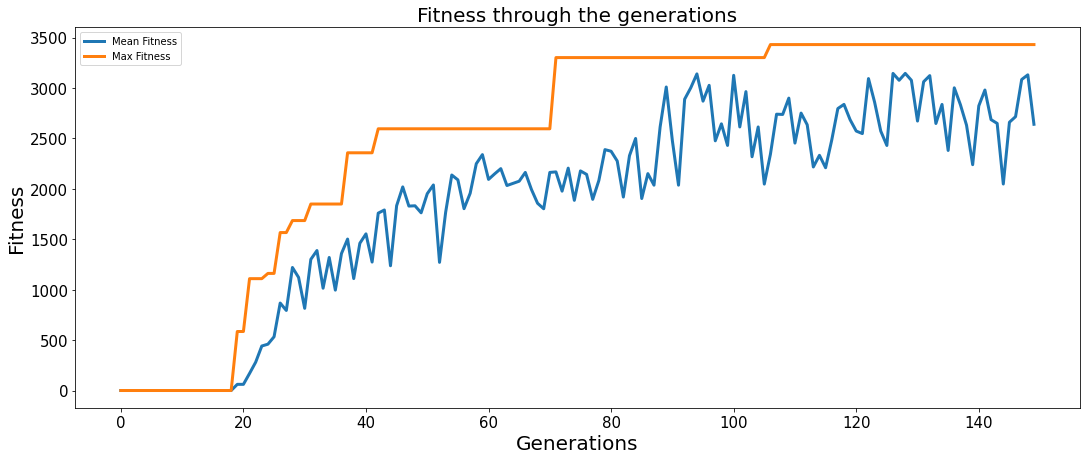

In [10]:
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]

plt.figure(figsize = (18, 7))
plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness', linewidth = 3)
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness', linewidth = 3)
plt.legend()
plt.title('Fitness through the generations', size = 20)
plt.xlabel('Generations', size = 20)
plt.ylabel('Fitness', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()